# Import des packages et définition des cibles

In [77]:
# Import packages
import numpy as np
import pandas as pd
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns

from joblib import Parallel, delayed
from pybdm import  BDM
from pybdm.utils import decompose_dataset

from tqdm import tqdm

from utils import Evolution, compute_proba, compute_proba_uni

sns.set(rc={'figure.figsize':(11.7,8.27),"font.size":20, "axes.titlesize":20,
            "axes.labelsize":20}, style="whitegrid")
bdm = BDM(ndim=2)

In [2]:
n_size = 8

# Definition of the plain graph
plain = np.ones((n_size, n_size), dtype='int')

# Definition of the star graph
indices = [[i, i] for i in range(n_size)]
indices += [[0, i] for i in range(n_size)]
indices += [[i, 0] for i in range(n_size)]
star = np.zeros((n_size, n_size), dtype='int')
star[tuple(zip(*indices))] = 1

# Definition of the grid graph
indices = [[i, i] for i in range(n_size)]
indices += [[i, i+1] for i in range(n_size-1)]
indices += [[i+1, i] for i in range(n_size-1)]
indices += [[1, 5], [3, 7], [5, 1], [7, 3]]
grid = np.zeros((n_size, n_size), dtype='int')
grid[tuple(zip(*indices))] = 1

# Analyses - Matrices de 8 bits

## Random matrices

### Matrice of size 8 (1 shift)

In [3]:
n_size = 8
n_random = 100
initials = np.random.randint(2, size=(n_random, n_size, n_size))
targets = np.random.randint(2, size=(n_random, n_size, n_size))

In [7]:
evo = Evolution(n_size, n_shift=1, alpha=0, t_ext=2500, replace=False)
df_evo_rand_81 = evo.generate_df(initials, targets)

Step 1 - Computing results for method 'bdm'


100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 70.57it/s]


Step 2 - Computing results for method 'uniform'


100%|███████████████████████████████████████| 100/100 [00:00<00:00, 1970.41it/s]

Step 3 - Generating DataFrame...
Done !


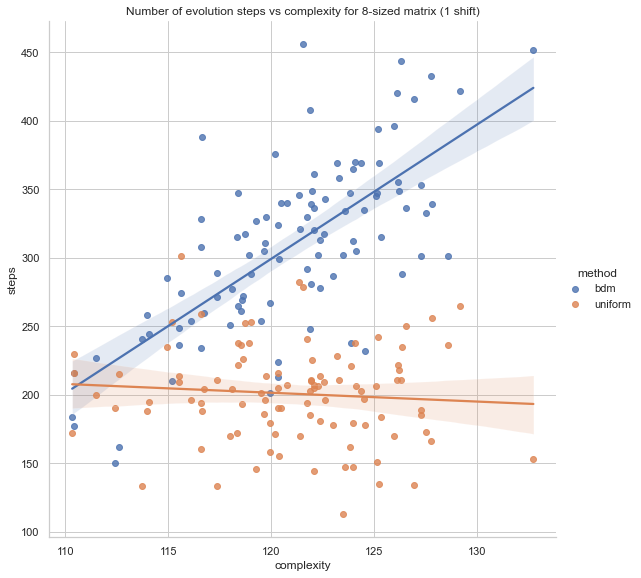

In [8]:
data = df_evo_rand_81[df_evo_rand_81.extinction == 0]
fig = sns.lmplot(data=data, x='complexity', y='steps', hue='method', height=8)
fig.set(title="Number of evolution steps vs complexity for 8-sized matrix (1 shift)")
plt.savefig('images/random_81.png');

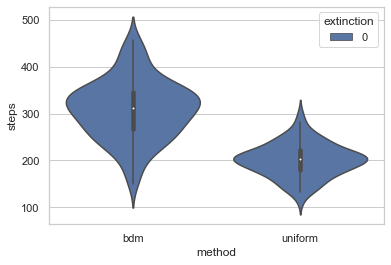

In [9]:
sns.violinplot(data=df_evo_rand_81, x='method', y='steps', hue='extinction')
plt.savefig('images/random_81_violin.png');

### Matrice of size 8 (2 shifts)

In [14]:
evo = Evolution(n_size, n_shift=2, alpha=0, t_ext=2500, replace=False)
df_evo_rand_82 = evo.generate_df(initials, targets);

 47%|███████████████████▋                      | 47/100 [00:40<00:45,  1.17it/s]


Step 1 - Computing results for method 'bdm'


100%|█████████████████████████████████████████| 100/100 [00:29<00:00,  3.39it/s]


Step 2 - Computing results for method 'uniform'


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 253.83it/s]


Step 3 - Generating DataFrame...
Done !


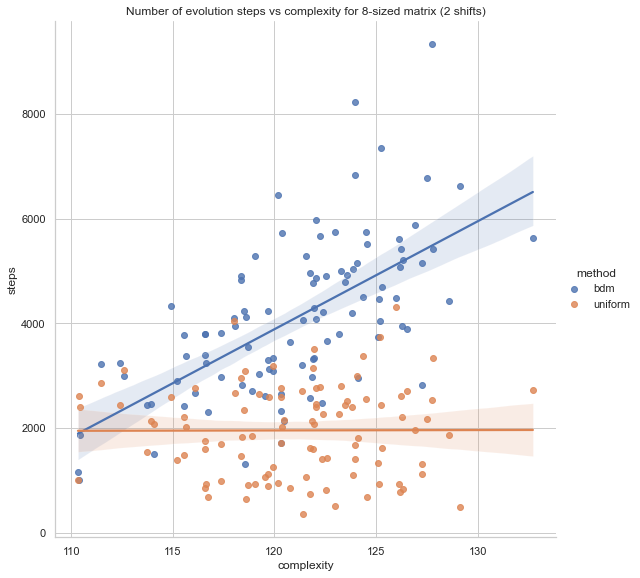

In [15]:
data = df_evo_rand_82[df_evo_rand_82.extinction == 0]
fig = sns.lmplot(data=data, x='complexity', y='steps', hue='method', height=8)
fig.set(title="Number of evolution steps vs complexity for 8-sized matrix (2 shifts)")
plt.savefig('images/random_82.png');

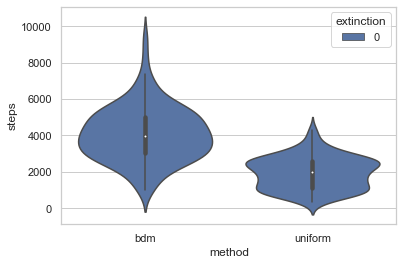

In [16]:
sns.violinplot(data=df_evo_rand_82, x='method', y='steps', hue='extinction')
plt.savefig('images/random_82_violin.png');

### Matrice of size 8 (3 shifts)

To do

## Generated Matrices with various complexity

### Matrice of size 8

In [17]:
# Generation of a set of target matrices with various complexity
generated_seq = []
for _ in range(2):
    for i in tqdm(range(85, 135)):
        complexity = 126
        while complexity > i:
            target = np.random.randint(2, size=(n_size, n_size))
            complexity = bdm.bdm(target)
        generated_seq.append(target)

for i in range(3):
    for _ in range(20):
        indices = np.random.randint(n_size, size=(2, i+1))
        target = np.zeros((n_size, n_size), dtype='int')
        target[tuple(indices)] = 1
        generated_seq.append(target)

100%|███████████████████████████████████████████| 50/50 [00:31<00:00,  1.58it/s]


In [23]:
n_matrices = len(generated_seq)
targets = np.array(generated_seq)
initials = np.random.randint(2, size=(n_matrices, n_size, n_size))

In [25]:
evo = Evolution(n_size, n_shift=1, alpha=0, t_ext=2500, replace=False)
df_evo_gen_81 = evo.generate_df(initials, targets)

Step 1 - Computing results for method 'bdm'


100%|█████████████████████████████████████████| 160/160 [00:02<00:00, 63.71it/s]


Step 2 - Computing results for method 'uniform'


100%|███████████████████████████████████████| 160/160 [00:00<00:00, 2354.67it/s]

Step 3 - Generating DataFrame...
Done !


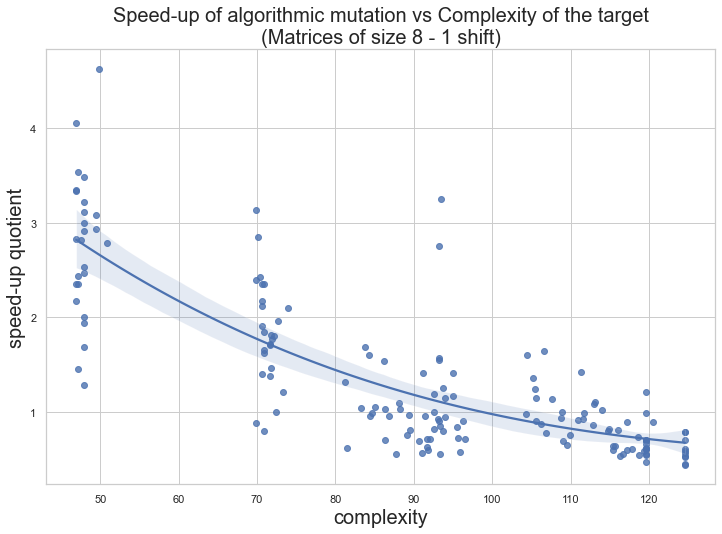

In [85]:
fig, ax = plt.subplots(figsize=(12, 8))
data = df_evo_gen_81[df_evo_gen_81.method == 'bdm']
b = sns.regplot(data=data, x='complexity', y='speedup', order=3)
b.axes.set_title("Speed-up of algorithmic mutation vs Complexity of the target\n\
(Matrices of size 8 - 1 shift)",fontsize=20)
b.set_ylabel('speed-up quotient')
plt.savefig('images/speedup_81.png');

In [28]:
evo = Evolution(n_size, n_shift=2, alpha=0, t_ext=2500, replace=False)
df_evo_gen_82 = evo.generate_df(initials, targets)

Step 1 - Computing results for method 'bdm'


100%|█████████████████████████████████████████| 160/160 [00:47<00:00,  3.33it/s]


Step 2 - Computing results for method 'uniform'


100%|████████████████████████████████████████| 160/160 [00:00<00:00, 188.35it/s]


Step 3 - Generating DataFrame...
Done !


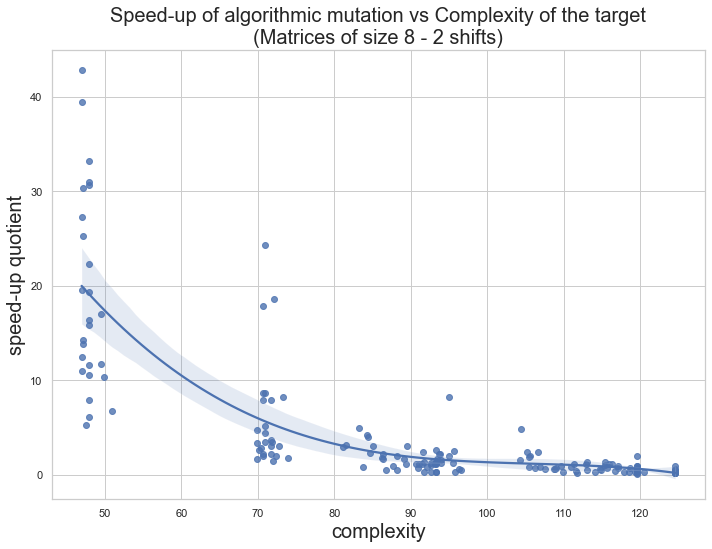

In [86]:
data = df_evo_gen_82[df_evo_gen_82.method == 'bdm']
b = sns.regplot(data=data, x='complexity', y='speedup', order=3)
b.axes.set_title("Speed-up of algorithmic mutation vs Complexity of the target\n\
(Matrices of size 8 - 2 shifts)",fontsize=20)
b.set_ylabel('speed-up quotient')
plt.savefig('images/speedup_82.png');

# Analyses - Matrices de taille 16

In [32]:
n_size = 16
n_random = 100
initials = np.random.randint(2, size=(n_random, n_size, n_size))
targets = np.random.randint(2, size=(n_random, n_size, n_size))

In [33]:
evo = Evolution(n_size, n_shift=1, alpha=0, t_ext=2500, replace=False)
df_evo_rand_161 = evo.generate_df(initials, targets)

Step 1 - Computing results for method 'bdm'


100%|█████████████████████████████████████████| 100/100 [01:13<00:00,  1.36it/s]


Step 2 - Computing results for method 'uniform'


100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 67.52it/s]


Step 3 - Generating DataFrame...
Done !


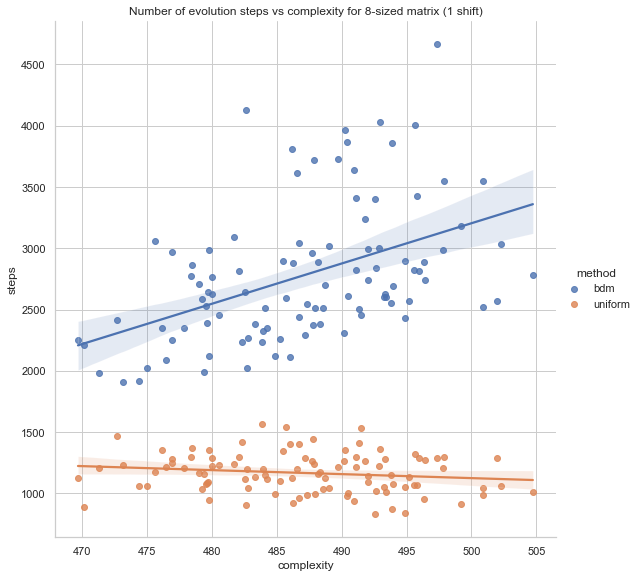

In [34]:
data = df_evo_rand_161[df_evo_rand_161.extinction == 0]
fig = sns.lmplot(data=data, x='complexity', y='steps', hue='method', height=8)
fig.set(title="Number of evolution steps vs complexity for 8-sized matrix (1 shift)")
plt.savefig('images/random_161.png');

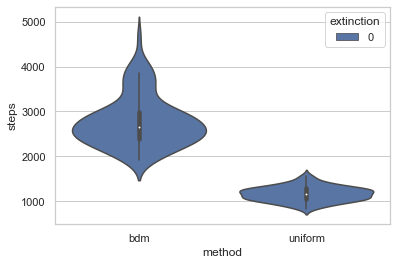

In [36]:
sns.violinplot(data=df_evo_rand_161, x='method', y='steps', hue='extinction')
plt.savefig('images/random_161_violin.png');

<AxesSubplot:xlabel='complexity', ylabel='speedup'>

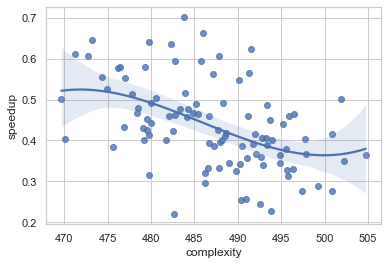

In [38]:
data = df_evo_rand_161[df_evo_rand_161.method == 'bdm']
sns.regplot(data=data, x='complexity', y='speedup', order=3)

In [42]:
# Generation of a set of target matrices with various complexity
generated_seq = []
n_size=16
for i in range(20):
    for _ in range(5):
        indices = np.random.randint(n_size, size=(2, i+1))
        target = np.zeros((n_size, n_size), dtype='int')
        target[tuple(indices)] = 1
        generated_seq.append(target)

In [45]:
n_matrices = len(generated_seq)
targets = np.array(generated_seq)
initials = np.random.randint(2, size=(n_matrices, n_size, n_size))

In [46]:
evo = Evolution(n_size, n_shift=1, alpha=0, t_ext=2500, replace=False)
df_evo_gen_161 = evo.generate_df(initials, targets)

Step 1 - Computing results for method 'bdm'


100%|█████████████████████████████████████████| 100/100 [01:10<00:00,  1.43it/s]


Step 2 - Computing results for method 'uniform'


100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 61.52it/s]


Step 3 - Generating DataFrame...
Done !


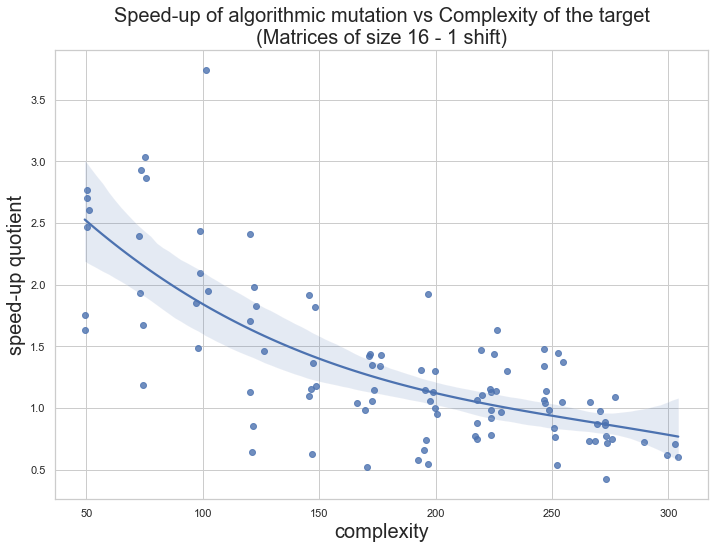

In [87]:
data = df_evo_gen_161[df_evo_gen_161.method == 'bdm']
b = sns.regplot(data=data, x='complexity', y='speedup', order=3)
b.axes.set_title("Speed-up of algorithmic mutation vs Complexity of the target\n\
(Matrices of size 16 - 1 shift)",fontsize=20)
b.set_ylabel('speed-up quotient')
plt.savefig('images/speedup_161.png');

In [50]:
evo = Evolution(n_size, n_shift=2, alpha=0, t_ext=2500, replace=False)
df_evo_gen_162 = evo.generate_df(initials, targets)

Step 1 - Computing results for method 'bdm'


100%|███████████████████████████████████████| 100/100 [1:36:16<00:00, 57.76s/it]


Step 2 - Computing results for method 'uniform'


100%|█████████████████████████████████████████| 100/100 [02:15<00:00,  1.35s/it]


Step 3 - Generating DataFrame...
Done !


<AxesSubplot:xlabel='complexity', ylabel='speedup'>

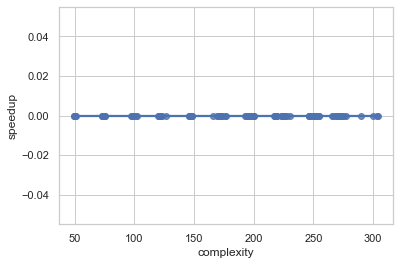

In [51]:
data = df_evo_gen_162[df_evo_gen_162.method == 'bdm']
sns.regplot(data=data, x='complexity', y='speedup', order=3)

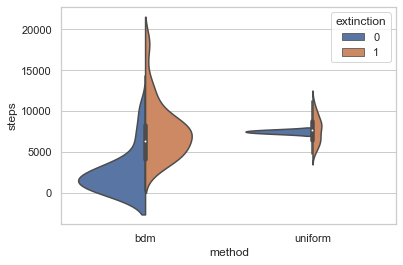

In [63]:
sns.violinplot(data=df_evo_gen_162, x='method', y='steps', hue='extinction', split=True)
plt.savefig('images/random_162_violin.png');